In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 4


Initial state: 0
Transition function: [
  {(): 0, ('a',): 0, ('b',): 0, ('c',): 3, ('a', 'b'): 0, ('a', 'c'): 3, ('b', 'c'): 3, ('a', 'b', 'c'): 3},
  {(): 1, ('a',): 1, ('b',): 1, ('c',): 3, ('a', 'b'): 1, ('a', 'c'): 3, ('b', 'c'): 3, ('a', 'b', 'c'): 3},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 3, ('a', 'b'): 2, ('a', 'c'): 3, ('b', 'c'): 3, ('a', 'b', 'c'): 3},
  {(): 3, ('a',): 3, ('b',): 3, ('c',): 3, ('a', 'b'): 3, ('a', 'c'): 3, ('b', 'c'): 3, ('a', 'b', 'c'): 3}
]
Acceptance: [
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [True], ('b',): [None], ('c',): [None], ('a', 'b'): [True], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [True], ('c',): [None], ('a', 'b'): [True], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None],

(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures

# Construct the product MDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_20516/1065089555.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6])],
         [list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6])],
         [list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
          list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6])],
         [list([0, 1, 2, 3, 5, 6]), list([0, 1, 2, 3, 5, 6]),
     

In [ ]:
 t2, epsilon, average_accumulated_rewards = csrl.train_DRQN(EPISODES=15000, num_steps=600, batch_size=32, weights_update=50, state_sequence_size=5, label_sequence_size=5)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Exploration Rate (Epsilon)', fontsize=12, color = 'red') 
ax1.plot(t2, epsilon, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Accumulated Rewards / 10 Episodes', fontsize=12, color = 'blue') 
ax2.plot(t2, average_accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
#plt.title('The Accumulated Rewards of 10 by 10 Grid-world Simulation (label uncertainty Pl = 1.0)', fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

In [ ]:
# save the results
np.array(t2).tofile('t2_task1_pl_1_q.csv', sep = ',')
np.array(average_accumulated_rewards).tofile('average_accumulated_rewards_task1_pl_1_q.csv', sep = ',')

In [5]:
# read the results
t2 = np.loadtxt('t2_task1_pl_1_q.csv', delimiter=',')
rewards_task1_10_Q_seq5 = np.loadtxt('average_accumulated_rewards_task1_pl_1_q.csv', delimiter=',')

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [7]:
t = cumsum_sma(t2,50)
averaged = cumsum_sma(rewards_task1_10_Q_seq5,50)

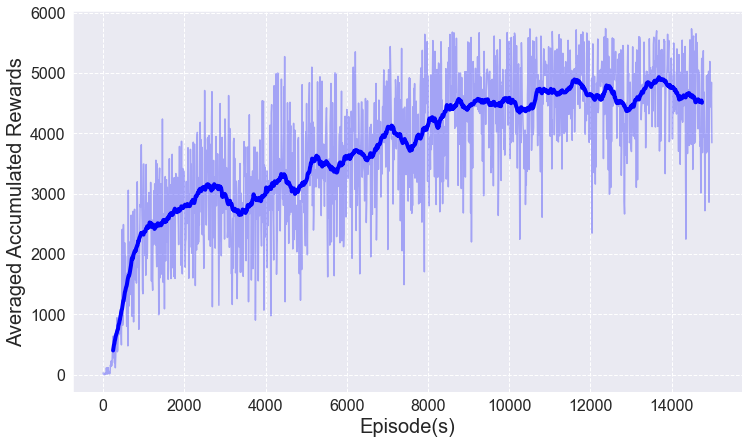

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel('Episode(s)', fontsize=20) 
ax.set_ylabel('Averaged Accumulated Rewards', fontsize=20) 

# We change the fontsize of ticks label 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

sns.set_style("darkgrid")

sns.lineplot(x = t2, y = rewards_task1_10_Q_seq5, color='blue', alpha=0.3)
sns.lineplot(x = t, y = averaged, color='blue', linewidth=4)
#plt.legend(['Task 2, Pl=0.9, q state', 'Task 2, Pl=1.0, q state', 'Task 2, Pl=1.0, label state'], fontsize=14, loc='upper left')#, title='600 steps',title_fontsize=16)

plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
#sns.move_legend(ax, loc='upper left', frameon=False)

In [ ]:
Path = csrl.verify_DRQN(EPISODES=10, num_steps=50, state_sequence_size=7, label_sequence_size=3)